In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import cmath
import math 
def custom_plot_single(x_lst, y_lst, label_lst, xlim, ylim, label,pltname,
                       color=['k','r','b','g','o','br'],
                       linestyle=['solid','dashed','solid','dashed','solid','dashed'],
                       markertype=[None,None,'o','^','o','^'],
                       fillstyle=['none','none','none','none','full','full'],
                       linewidth=20*[3],
                       markevery=[45,30,50,40,56,72,63,95],
                       show_legend=True,
                       plt_outside=False):
    
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    fig.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')
    for p in range(0, len(x_lst)):
        ax1.plot(x_lst[p], y_lst[p], color[p],
                 linewidth=linewidth[p],
                 linestyle=linestyle[p],
                 marker=markertype[p],
                 fillstyle=fillstyle[p],
                 markevery=markevery[p],
                 markersize=8,
                 label=label_lst[p])
    if(show_legend):
        ax1.legend(prop={'size': 20},loc='best')
    ax1.tick_params(which='minor', width=2, length=4, color='k')
    ax1.tick_params(which='major', width=2, length=8, color='k')

    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    if(show_legend):
        ax1.legend(prop={'size': 20},loc='best')#,shadow=True)

    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax1.set_xlabel(label[0], fontsize=25)#, fontdict=dict(weight='bold'))
    ax1.set_ylabel(label[1], fontsize=25)#, fontdict=dict(weight='bold'))
    fontsize=25
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)

    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    if(plt_outside==False):
        plt.savefig(pltname, bbox_inches = "tight")
    return plt,pltname

def custom_plot_single(x_lst, y_lst, label_lst, xlim, ylim, label,pltname,
                       color=['k','r','b','g','o','br'],
                       linestyle=['solid','dashed','solid','dashed','solid','dashed'],
                       markertype=[None,None,'o','^','o','^'],
                       fillstyle=['none','none','none','none','full','full'],
                       linewidth=20*[3],
                       markevery=[45,30,50,40,56,72,63,95],
                       show_legend=True,
                       plt_outside=False):
    
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    fig.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')
    for p in range(0, len(x_lst)):
        ax1.plot(x_lst[p], y_lst[p], color[p],
                 linewidth=linewidth[p],
                 linestyle=linestyle[p],
                 marker=markertype[p],
                 fillstyle=fillstyle[p],
                 markevery=markevery[p],
                 markersize=8,
                 label=label_lst[p])
    if(show_legend):
        ax1.legend(prop={'size': 20},loc='best')
    ax1.tick_params(which='minor', width=2, length=4, color='k')
    ax1.tick_params(which='major', width=2, length=8, color='k')

    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    if(show_legend):
        ax1.legend(prop={'size': 20},loc='best')#,shadow=True)

    ax1.set_yscale('log')

    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax1.set_xlabel(label[0], fontsize=25)#, fontdict=dict(weight='bold'))
    ax1.set_ylabel(label[1], fontsize=25)#, fontdict=dict(weight='bold'))
    fontsize=25
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)

    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    if(plt_outside==False):
        plt.savefig(pltname, bbox_inches = "tight")
    return plt,pltname

In [7]:
import pandas as pd
num_files=2
path1 = 'without_pt_charge/'
path2 = 'with_pt_charge/'
file_prefix = 'Conductance_vs_FermiLevel_CNT_17_0_Temp_298'
file_name = np.empty(num_files,dtype=object)
file_name[0] = path1 + file_prefix + '_1Subband.dat'
file_name[1] = path2 + file_prefix + '_1Subband.dat'
print(file_name)
#file_name[2] = path2 + file_prefix + 'CNT_17_0_Temp_298_mq_N20.dat'

data_pts = 100
f_level = np.zeros([num_files,data_pts], dtype=float)
Gtot   = np.zeros([num_files,data_pts], dtype=float)

for i in range(0, num_files):
    data_ith= pd.read_csv(file_name[i], sep=" ", skiprows=1, usecols=[0,1], 
                          names=["Ef_arr", "Gtot"])
    f_level[i] = data_ith.Ef_arr
    Gtot[i] = data_ith.Gtot

['without_pt_charge/Conductance_vs_FermiLevel_CNT_17_0_Temp_298_1Subband.dat'
 'with_pt_charge/Conductance_vs_FermiLevel_CNT_17_0_Temp_298_1Subband.dat']


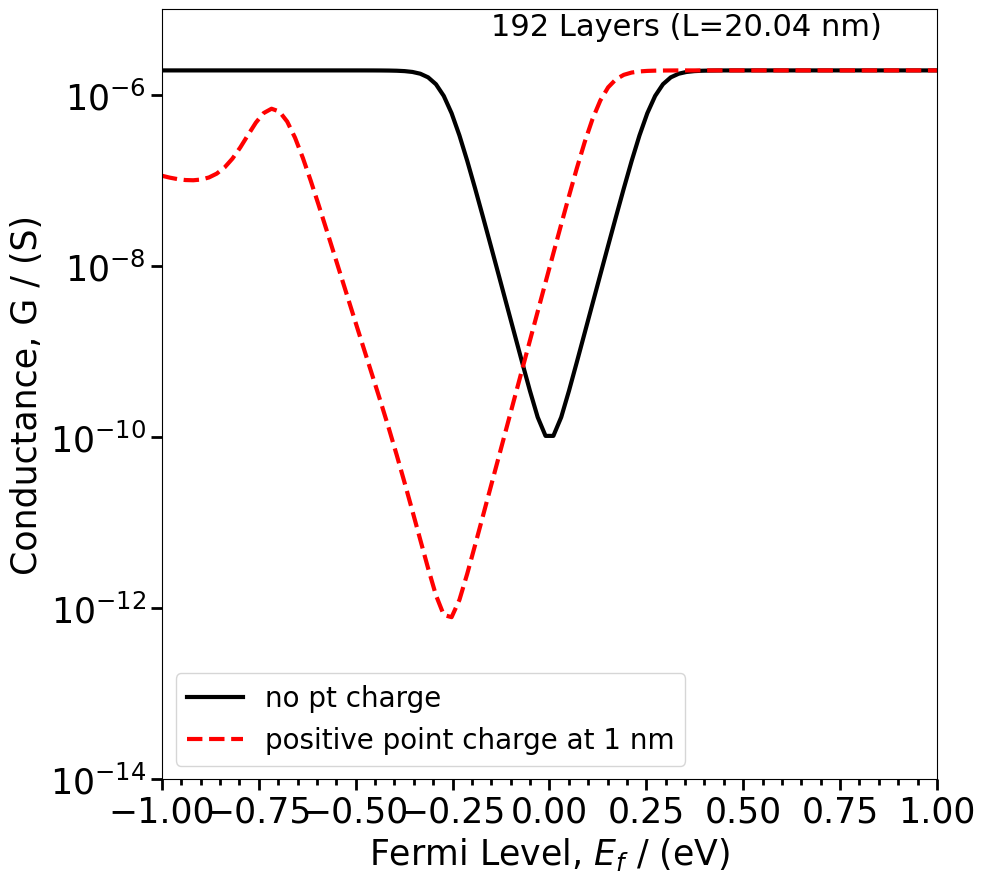

In [9]:
plt,pltname = custom_plot_single([ f_level[0], f_level[1]], 
                    [Gtot[0], Gtot[1]],
                    [r'no pt charge', r'positive point charge at 1 nm'],
                    [-1,1],[1e-14,1e-5],
                    [r'Fermi Level, $E_f$ / (eV)',r'Conductance, G / (S)'],
                    'Compare_Conductance_withNout_ptCharge_192Layers.png',
                    linestyle=['solid','dashed','dashdot'],
                    plt_outside=True)

plt.text(-0.15, 5e-6, '192 Layers (L=20.04 nm)', fontsize=22,color='k')
plt.savefig(pltname, bbox_inches = "tight")